# Drills - Linear regression

## DRILL: fixing assumptions

by: Melissa N 


Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


In [3]:
# Check variable types.
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [4]:
# Making dummies.
# Also creating a data frame to hold our features.
features = data
display(features.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


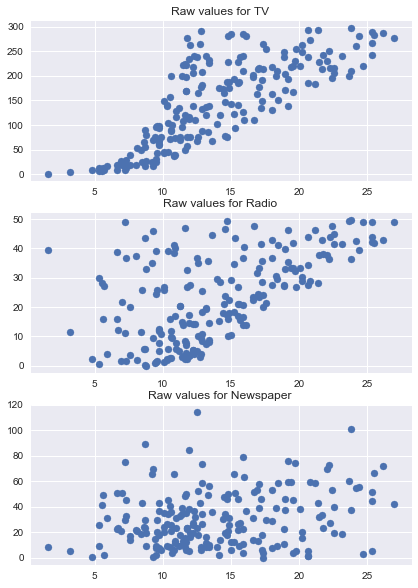

In [5]:
# Plot the data as-is. Looks a mite quadratic.

plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.scatter(Y, X['TV'])
plt.title('Raw values for TV ')

plt.subplot(3, 2, 3)
plt.scatter(Y, X['Radio'])
plt.title('Raw values for Radio ')

plt.subplot(3, 2, 5)
plt.scatter(Y, X['Newspaper'])
plt.title('Raw values for Newspaper ')

plt.show()


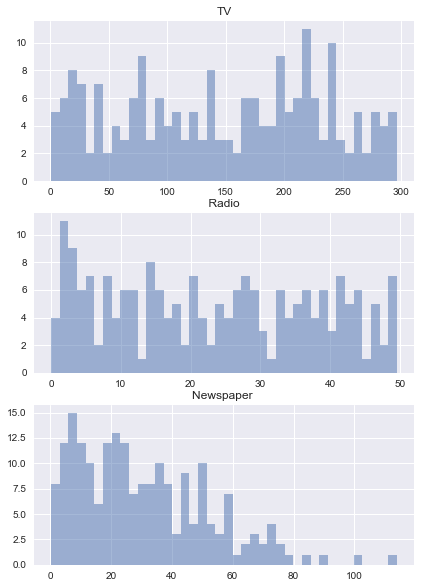

In [6]:
# Plot the data as-is. Looks a mite quadratic.

plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)

plt.hist(X['TV'], label = 'TV', alpha = 0.5, bins = 40)
plt.title('TV')

plt.subplot(3, 2, 3)
plt.hist(X['Radio'], label = 'Radion', alpha = 0.5, bins = 40)
plt.title(' Radio ')

plt.subplot(3, 2, 5)
plt.hist(X['Newspaper'], label = 'Newspaper', alpha = 0.5, bins = 40)
plt.title('Newspaper ')

plt.show()

In [7]:
### Create the new feature, (TV)^2
features['TV_sqrt'] = np.sqrt(features['TV'])

features['Newspaper_log'] = np.log(features['Newspaper'])


## Verify Assumptions

1- linear relationship

In [8]:
Y1 = features['Sales'].values.reshape(-1, 1)
X1 = features[['TV_sqrt','Radio','Newspaper_log']]

regr.fit(X1, Y1)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X1, Y1))


Coefficients: 
 [[ 0.97499052  0.194855   -0.02318851]]

Intercept: 
 [-1.55652102]

R-squared:
0.928968335219


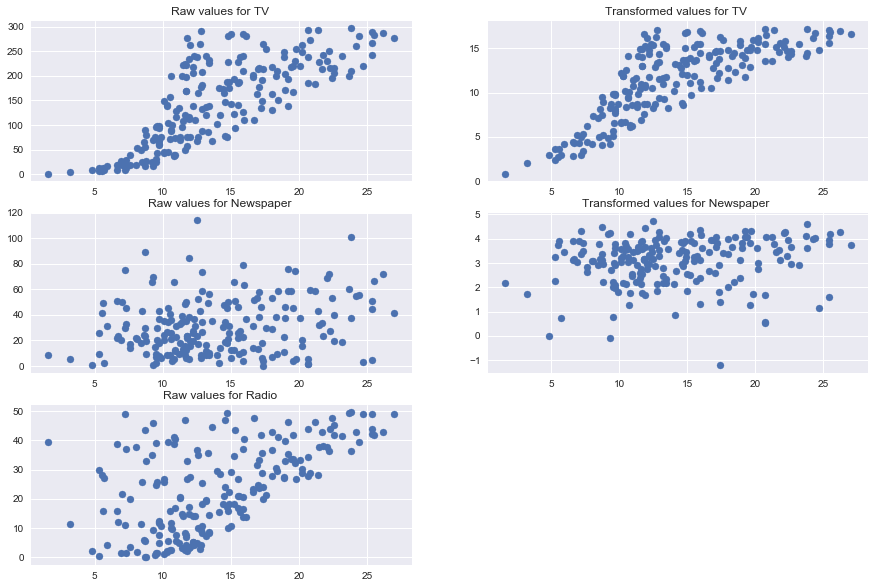

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.scatter(Y, X['TV'])
plt.title('Raw values for TV ')

plt.subplot(3, 2, 2)
plt.scatter(Y1, X1['TV_sqrt'])
plt.title('Transformed values for TV ')

plt.subplot(3, 2, 3)
plt.scatter(Y, X['Newspaper'])
plt.title('Raw values for Newspaper ')

plt.subplot(3, 2, 4)
plt.scatter(Y1, X1['Newspaper_log'])
plt.title('Transformed values for Newspaper ')

plt.subplot(3, 2, 5)
plt.scatter(Y, X['Radio'])
plt.title('Raw values for Radio ')

plt.show()

2- multivariate normality

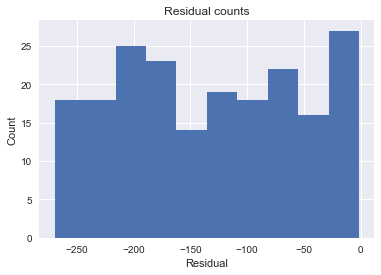

In [10]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

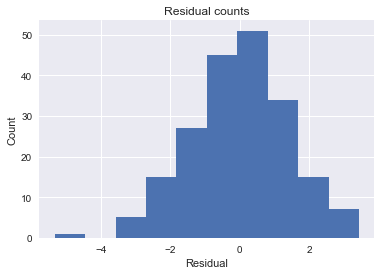

In [11]:
# Verify residual distribution.

# Extract predicted values.
predicted1 = regr.predict(X1)
actual1 = Y1
# Calculate the error, also called the residual.
residual1 = actual1 - predicted1

plt.hist(residual1)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

3- homoscedasticity

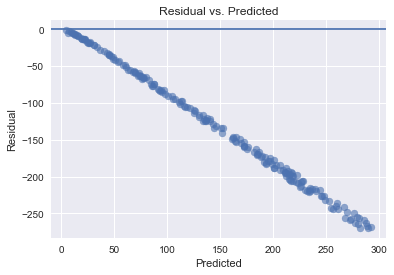

In [12]:
plt.scatter(predicted, residual, alpha=0.6 )
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



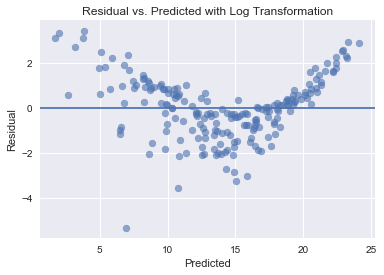

In [13]:
# Log transformation with outliers removed.

plt.scatter(predicted1, residual1, alpha=0.6)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with Log Transformation')
plt.show()



4-  low multicollinearity

In [14]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [15]:
correlation_matrix1 = X1.corr()
display(correlation_matrix1)

,TV_sqrt,Radio,Newspaper_log
TV_sqrt,1.000,0.029,0.032
Radio,0.029,1.000,0.237
Newspaper_log,0.032,0.237,1.000
